## Import packages

In [1]:
import os
import squidpy as sq
import anndata
import scanpy as sc
import seaborn as sns
import numpy as np
from scipy.sparse import csr_matrix, issparse

/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/spatialdata/__init__.py:11: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


## Read in anndata objects per sample and merge into one big anndata object

In [2]:
data_dir = "/Users/florian_wuennemann/1_Projects/MI_project/results/nf-core_molkart/anndata"

# Create an empty list to store the AnnData objects
adata_list = []

# Iterate over the files in the directory
for filename in os.listdir(data_dir):
    # Check if the file is an AnnData file
    if filename.endswith("_cellpose.h5ad"):
        # Read the AnnData file
        adata = anndata.read_h5ad(os.path.join(data_dir, filename))
        
        # Remove the file extension from the filename
        sample_name = os.path.splitext(filename)[0]
        
        # Add the filename as a new column to the obs DataFrame
        adata.obs['sample'] = sample_name

        adata.uns['spatial'] = sample_name
        
        # Append the AnnData object to the list
        adata_list.append(adata)

# Merge the AnnData objects
merged_adata = anndata.concat(adata_list, join='outer')

# Now, merged_adata is your merged AnnData object with spatial coordinates in the obsm["spatial"] slot
# and the filename as a variable in obs

/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


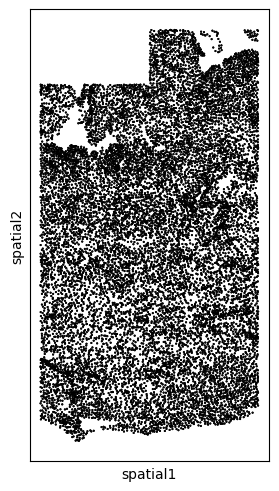

In [3]:
## Plot 2d spatial plot for 1 sample
sq.pl.spatial_scatter(
    merged_adata[merged_adata.obs['sample'] == 'sample_control_r1_s2_cellpose'], shape=None, size=1
)

In [4]:
## Filter cells
sc.pp.filter_cells(merged_adata, min_genes=2)
sc.pp.filter_genes(merged_adata, min_cells=3)

/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
## Store unnormalized object
merged_adata_unnormalized = merged_adata

## Normalization with pearson residuals

In [ ]:
merged_adata = merged_adata_unnormalized
# normalize using pearson residuals
merged_adata.layers["sqrt_norm"] = np.sqrt(sc.pp.normalize_total(merged_adata, inplace=False)["X"])
sc.experimental.pp.normalize_pearson_residuals(merged_adata)
sc.pp.pca(merged_adata)
sc.pp.neighbors(merged_adata)
sc.tl.umap(merged_adata)
sc.tl.leiden(merged_adata)
merged_adata

In [ ]:
# Get the unique sample names
unique_samples = merged_adata.obs['sample'].unique()

# Iterate over the unique sample names
for sample in unique_samples:
    # Subset the merged_adata for the current sample
    adata_sample = merged_adata[merged_adata.obs['sample'] == sample]
    
    # Plot the spatial_scatter for the subsetted data
    sq.pl.spatial_scatter(adata_sample, shape=None, color="leiden", size=2)

/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


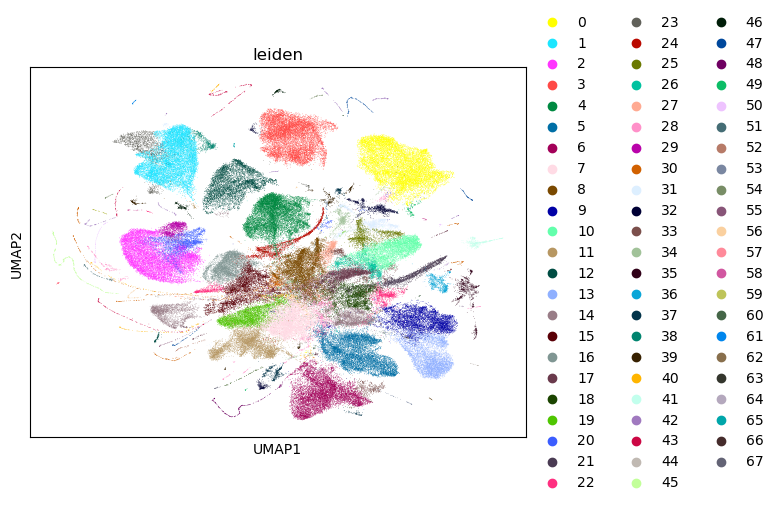

/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/florian_wuennemann/miniconda3/envs/spatialomics_MI/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


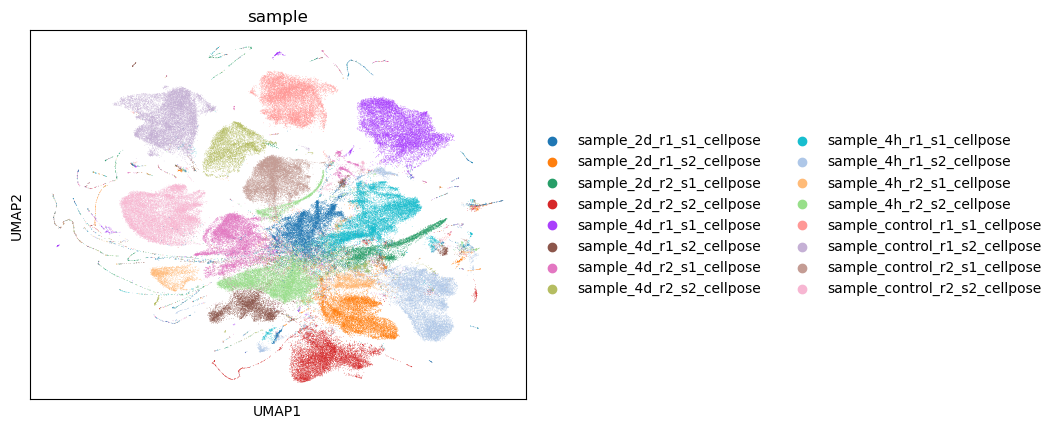

In [103]:
sc.pl.umap(merged_adata, color=['leiden'])
sc.pl.umap(merged_adata, color=['sample'])

## Normalization using cell area

In [12]:
merged_adata.layers["area_norm"] = merged_adata

<174218x101 sparse matrix of type '<class 'numpy.float32'>'
	with 2597206 stored elements in Compressed Sparse Row format>

In [ ]:

sc.pp.pca(merged_adata)
sc.pp.neighbors(merged_adata)
sc.tl.umap(merged_adata)
sc.tl.leiden(merged_adata)
merged_adata